### **Importing The Neccessary Libraries**

In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import joblib



### **Loading CSV File**

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.duplicated().sum()

0

In [6]:
df["loan_status"].unique()

array([1, 0], dtype=int64)

In [7]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

### **Creating Input Columns and Target Columns**

In [ ]:
input_cols = ['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file']
target_col = 'loan_status'


### **Creating Input Data Frame and Target Data Frame**

In [ ]:
x_df = df[input_cols]
y_df = df[target_col]


In [12]:
x_df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


### **Replacing Values To 1 and 0**

In [ ]:
x_df["person_gender"] = x_df["person_gender"].replace({'male':1,'female':0})
x_df["previous_loan_defaults_on_file"] = x_df["previous_loan_defaults_on_file"].replace({'Yes':1,'No':0})


In [15]:
x_df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,0
44996,37.0,0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,0
44997,33.0,1,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,0
44998,29.0,1,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,0


In [16]:
x_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

In [17]:
x_numerical_cols = ['person_age', 'person_gender','person_income','person_emp_exp','loan_amnt',
                          'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                          'credit_score', 'previous_loan_defaults_on_file']

In [18]:
x_categorical_cols = ['person_education','person_home_ownership','loan_intent']

### **Scaling Numerical Columns**

In [19]:
scaler = MinMaxScaler()
scaler.fit(x_df[x_numerical_cols])

MinMaxScaler()

In [20]:
x_numerical_cols

['person_age',
 'person_gender',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file']

In [21]:
x_df[x_numerical_cols] = scaler.transform(x_df[x_numerical_cols])

### **Encoding Categorical Columns Coz Computers Love Numerical values**

In [22]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")

In [23]:
encoder.fit(x_df[x_categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [24]:
encoded_cols = list(encoder.get_feature_names_out(x_categorical_cols))

In [25]:
encoded_cols

['person_education_Associate',
 'person_education_Bachelor',
 'person_education_Doctorate',
 'person_education_High School',
 'person_education_Master',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']

In [26]:
x_df[encoded_cols] = encoder.transform(x_df[x_categorical_cols])

In [27]:
x_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file',
       'person_education_Associate', 'person_education_Bachelor',
       'person_education_Doctorate', 'person_education_High School',
       'person_education_Master', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [28]:
x_df = x_df.drop(columns=x_categorical_cols)

In [29]:
x_df.describe().loc[['min','max']]

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### **Observing Correlations Between Features**

In [30]:
corr_df = pd.DataFrame(abs(x_df.corrwith(y_df)).sort_values(ascending=False))
corr_df.rename(columns={0:"Relation"},inplace=True)

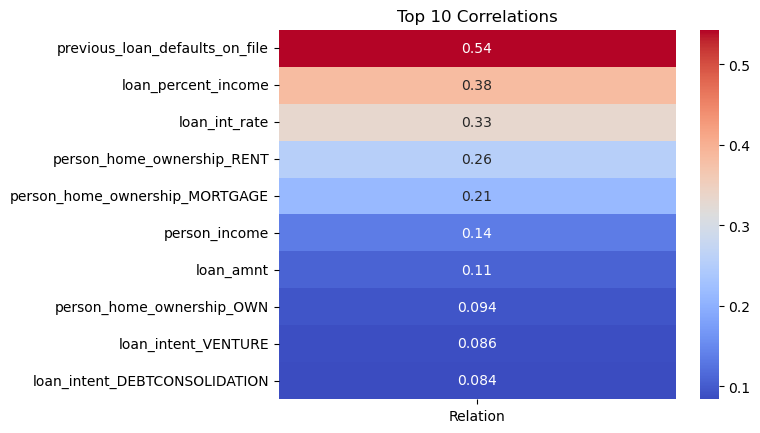

In [31]:
sns.heatmap(corr_df.head(10),cmap="coolwarm",annot=True)
plt.title("Top 10 Correlations")
plt.show()

### **Splitting The Data Into Train , Validation and Test Data Frames**

In [32]:
x_temp , X_test , y_temp , Y_test = train_test_split(x_df,y_df,test_size=0.2,random_state=7)
X_train , X_val , Y_train , Y_val = train_test_split(x_temp,y_temp,test_size=0.25,random_state=7)

In [33]:
X_train

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
24138,0.096774,0.0,0.010736,0.096,0.391304,0.141975,0.242424,0.285714,0.628261,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6729,0.024194,0.0,0.008019,0.000,0.159420,0.756516,0.136364,0.000000,0.623913,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4903,0.040323,1.0,0.006082,0.048,0.043478,0.000000,0.060606,0.035714,0.534783,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32911,0.048387,1.0,0.009129,0.024,0.059710,0.104252,0.045455,0.071429,0.458696,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
26780,0.056452,1.0,0.017814,0.040,0.681159,0.383402,0.272727,0.178571,0.439130,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13883,0.032258,0.0,0.007385,0.024,0.391304,0.305898,0.348485,0.000000,0.402174,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
36994,0.016129,1.0,0.008631,0.000,0.101449,0.165295,0.090909,0.035714,0.541304,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34375,0.040323,1.0,0.009843,0.040,0.316870,0.347737,0.227273,0.071429,0.434783,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13872,0.040323,1.0,0.015205,0.040,0.710145,0.628944,0.318182,0.000000,0.406522,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
Y_train

24138    0
6729     1
4903     0
32911    0
26780    0
        ..
13883    0
36994    0
34375    0
13872    0
29029    1
Name: loan_status, Length: 27000, dtype: int64

### **Creating Base-Line Models To Set a BenchMark**

In [35]:
def random_guess(inputs,targets):
    preds =  np.random.randint(0,2,size=len(inputs))
    accuracy = accuracy_score(preds,targets)
    print("accuracy is:- ",round(accuracy*100,2))


In [36]:
random_guess(x_df,y_df)

accuracy is:-  50.51


In [37]:
def all_no(inputs,targets):
    preds =  np.full(len(inputs), 0)
    accuracy = accuracy_score(preds,targets)
    print("accuracy is:- ",(accuracy*100))

In [38]:
all_no(x_df,y_df)

accuracy is:-  77.77777777777779


### **Creating a Function to Try Models**

In [39]:
def try_model(model_name,train_inputs,train_targets,val_inputs,val_targets,test_inputs,test_targets,**params):
    model = model_name(**params)
    model.fit(train_inputs,train_targets)
    train_preds = model.predict(train_inputs)
    train_accuracy = accuracy_score(train_preds,train_targets)
    val_preds = model.predict(val_inputs)
    val_accuracy = accuracy_score(val_preds,val_targets)
    test_preds = model.predict(test_inputs)
    test_accuracy = accuracy_score(test_preds,test_targets)
    print("Model =",model_name)
    print(f"Train accuracy is: {round(train_accuracy*100,3)}%")
    print(f"Validation accuracy is: {round(val_accuracy*100,3)}%")
    print(f"Test accuracy is: {round(test_accuracy*100,3)}%")
    return model


In [40]:
try_model(LogisticRegression, X_train, Y_train , X_val , Y_val , X_test , Y_test ,solver="liblinear")

Model = <class 'sklearn.linear_model._logistic.LogisticRegression'>
Train accuracy is: 89.607%
Validation accuracy is: 89.689%
Test accuracy is: 89.4%


LogisticRegression(solver='liblinear')

In [41]:
try_model(RandomForestClassifier, X_train, Y_train , X_val , Y_val , X_test , Y_test ,n_jobs=-1,random_state=7)

Model = <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Train accuracy is: 100.0%
Validation accuracy is: 92.978%
Test accuracy is: 92.711%


RandomForestClassifier(n_jobs=-1, random_state=7)

#### **XGBClassifier has the Best Accuracy Among all of them, So We will use This Model in Our Project.**

In [42]:
try_model(XGBClassifier, X_train, Y_train , X_val , Y_val , X_test , Y_test ,n_jobs=-1,random_state=7)

Model = <class 'xgboost.sklearn.XGBClassifier'>
Train accuracy is: 97.415%
Validation accuracy is: 93.133%
Test accuracy is: 93.133%


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=7, ...)

### **Function To Predict and Create The Confusion Matrices to check our model.**

In [43]:
def predict_and_plot(model_name, train_inputs, train_targets, val_inputs, val_targets, test_inputs, test_targets, **params):
    model = model_name(**params)
    model.fit(train_inputs, train_targets)

    # Predictions
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    test_preds = model.predict(test_inputs)

    # Accuracy scores
    train_accuracy = accuracy_score(train_preds, train_targets)
    val_accuracy = accuracy_score(val_preds, val_targets)
    test_accuracy = accuracy_score(test_preds, test_targets)

    # Confusion matrices 
    train_cf = confusion_matrix(train_targets, train_preds, normalize='true')  
    val_cf = confusion_matrix(val_targets, val_preds, normalize='true')
    test_cf = confusion_matrix(test_targets, test_preds, normalize='true')

    # Create a figure with 3 subplots side by side
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Train heatmap
    sns.heatmap(train_cf, annot=True, fmt=".2f", cmap="rocket", ax=ax1)
    ax1.set_title(f"Train Confusion Matrix\nAccuracy: {train_accuracy*100:.3f}")
    ax1.set_xlabel("Predicted")
    ax1.set_ylabel("True")

    # Validation heatmap
    sns.heatmap(val_cf, annot=True, fmt=".2f", cmap="Blues", ax=ax2)
    ax2.set_title(f"Validation Confusion Matrix\nAccuracy: {val_accuracy*100:.3f}")
    ax2.set_xlabel("Predicted")
    ax2.set_ylabel("True")

    # Test heatmap
    sns.heatmap(test_cf, annot=True, fmt=".2f", cmap="coolwarm", ax=ax3)
    ax3.set_title(f"Test Confusion Matrix\nAccuracy: {test_accuracy*100:.3f}")
    ax3.set_xlabel("Predicted")
    ax3.set_ylabel("True")

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plot
    plt.show()

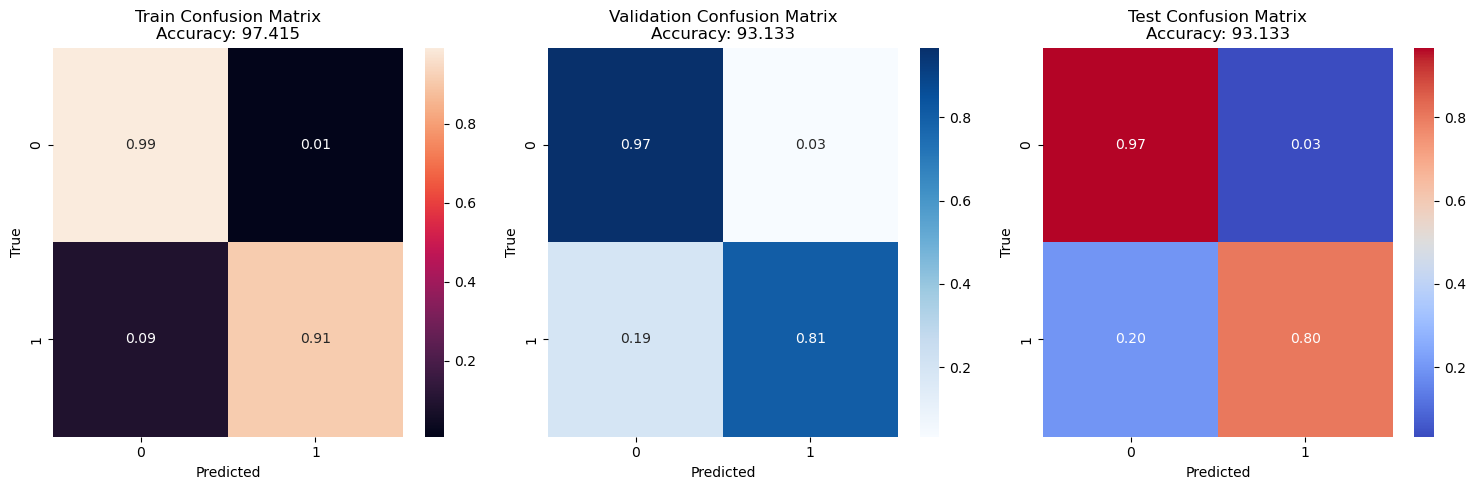

In [44]:
predict_and_plot(XGBClassifier, X_train, Y_train , X_val , Y_val , X_test , Y_test ,n_jobs=-1,random_state=7)

### **Prediction on Single Inputs with Minimal Features**

In [45]:
abs(x_df.corrwith(y_df)).sort_values(ascending=False).head(8).index


Index(['previous_loan_defaults_on_file', 'loan_percent_income',
       'loan_int_rate', 'person_home_ownership_RENT',
       'person_home_ownership_MORTGAGE', 'person_income', 'loan_amnt',
       'person_home_ownership_OWN'],
      dtype='object')

In [46]:
single_input_cols = ['previous_loan_defaults_on_file', 'loan_percent_income',
        'person_home_ownership',
        'person_income', 'loan_amnt','credit_score']

### **Taking Inputs From The User**

In [47]:
#Error Handling
def get_valid_yes_no_input(prompt):
    while True:
        value = input(prompt).strip().lower()
        if value in ["yes", "no"]:
            return 1 if value == "yes" else 0
        print("Invalid input! Please enter 'yes' or 'no'.")

def get_valid_home_ownership(prompt):
    valid_options = {"RENT", "OWN", "MORTGAGE"}
    while True:
        value = input(prompt).strip().upper()
        if value in valid_options:
            return value
        print("Invalid input! Please enter 'RENT', 'OWN', or 'MORTGAGE'.")

def get_valid_float_input(prompt):
    while True:
        try:
            value = float(input(prompt).strip())
            if value > 0:
                return value
            else:
                print("Value must be positive. Try again.")
        except ValueError:
            print("Invalid input! Please enter a numeric value.")

# Get user inputs
previous_loan_defaults = get_valid_yes_no_input("Do you have any previous loan defaults on file? (yes/no) ")
person_home_ownership = get_valid_home_ownership("What is your home ownership type (RENT / OWN / MORTGAGE)? ")
person_income = get_valid_float_input("What is your yearly income? ")
loan_amnt = get_valid_float_input("How much money do you want to borrow? ")
credit_score = get_valid_float_input("What is your credit score? ")

# Store them in a dictionary
single_input = {
    'previous_loan_defaults_on_file': previous_loan_defaults,
    'person_home_ownership': person_home_ownership,
    'person_income': person_income,
    'loan_amnt': loan_amnt,
    'credit_score': credit_score,
    'loan_percent_income': round((loan_amnt / person_income), 2),
    'loan_int_rate': round(18 - (0.015 * credit_score) + 15 * (loan_amnt / person_income), 2)
}

# Print the final dictionary
print("\nUser Input Summary:")
print(single_input)



User Input Summary:
{'previous_loan_defaults_on_file': 1, 'person_home_ownership': 'RENT', 'person_income': 3.0, 'loan_amnt': 2.0, 'credit_score': 2.0, 'loan_percent_income': 0.67, 'loan_int_rate': 27.97}


### **Preprocessing the Data**

In [48]:
single_input_df = pd.DataFrame([single_input])

In [49]:
single_input_df

,previous_loan_defaults_on_file,person_home_ownership,person_income,loan_amnt,credit_score,loan_percent_income,loan_int_rate
0,1,RENT,3.0,2.0,2.0,0.67,27.97


In [50]:
single_input_df.columns

Index(['previous_loan_defaults_on_file', 'person_home_ownership',
       'person_income', 'loan_amnt', 'credit_score', 'loan_percent_income',
       'loan_int_rate'],
      dtype='object')

In [51]:
single_input_num_cols = ['previous_loan_defaults_on_file','person_income', 'loan_amnt', 'credit_score', 'loan_percent_income','loan_int_rate']
single_input_cat_col = 'person_home_ownership'


In [52]:
SI_encoder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")
SI_encoder.fit(pd.DataFrame(single_input_df["person_home_ownership"]))
SI_encoded_col = list(SI_encoder.get_feature_names_out())
single_input_df[SI_encoded_col] = SI_encoder.transform(pd.DataFrame(single_input_df["person_home_ownership"]))

In [53]:
SI_encoded_col

['person_home_ownership_RENT']

In [54]:
single_input_num_cols

['previous_loan_defaults_on_file',
 'person_income',
 'loan_amnt',
 'credit_score',
 'loan_percent_income',
 'loan_int_rate']

In [55]:
SI_scaler = MinMaxScaler()
SI_scaler.fit(df[single_input_num_cols].replace({'Yes':1,'No':0}))
single_input_df[single_input_num_cols] = SI_scaler.transform(single_input_df[single_input_num_cols])


In [56]:
single_input_df.describe().loc[['min','max']]

,previous_loan_defaults_on_file,person_income,loan_amnt,credit_score,loan_percent_income,loan_int_rate,person_home_ownership_RENT
min,1.0,-0.001112,-0.014435,-0.843478,1.015152,1.546639,1.0
max,1.0,-0.001112,-0.014435,-0.843478,1.015152,1.546639,1.0


In [57]:
single_input_df = single_input_df[single_input_num_cols+SI_encoded_col]

In [58]:
model = XGBClassifier(n_jobs=-1,random_state=7)
model.fit(X_train[single_input_num_cols+SI_encoded_col],Y_train)
model.predict(single_input_df)

array([0])

## **Putting It All Together**

In [75]:
single_input_cols = ['previous_loan_defaults_on_file', 'loan_percent_income',
        'person_home_ownership',
        'person_income', 'loan_amnt','credit_score']
#Error Handling
def get_valid_yes_no_input(prompt):
    while True:
        value = input(prompt).strip().lower()
        if value in ["yes", "no"]:
            return 1 if value == "yes" else 0
        print("Invalid input! Please enter 'yes' or 'no'.")

def get_valid_home_ownership(prompt):
    valid_options = {"RENT", "OWN", "MORTGAGE"}
    while True:
        value = input(prompt).strip().upper()
        if value in valid_options:
            return value
        print("Invalid input! Please enter 'RENT', 'OWN', or 'MORTGAGE'.")

def get_valid_float_input(prompt):
    while True:
        try:
            value = float(input(prompt).strip())
            if value > 0:
                return value
            else:
                print("Value must be positive. Try again.")
        except ValueError:
            print("Invalid input! Please enter a numeric value.")

# Get user inputs
previous_loan_defaults = get_valid_yes_no_input("Do you have any previous loan defaults on file? (yes/no) ")
person_home_ownership = get_valid_home_ownership("What is your home ownership type (RENT / OWN / MORTGAGE)? ")
person_income = get_valid_float_input("What is your yearly income? ")
loan_amnt = get_valid_float_input("How much money do you want to borrow? ")
credit_score = get_valid_float_input("What is your credit score? ")

# Store them in a dictionary
single_input = {
    'previous_loan_defaults_on_file': previous_loan_defaults,
    'person_home_ownership': person_home_ownership,
    'person_income': person_income,
    'loan_amnt': loan_amnt,
    'credit_score': credit_score,
    'loan_percent_income': round((loan_amnt / person_income), 2),
    'loan_int_rate': round(18 - (0.015 * credit_score) + 15 * (loan_amnt / person_income), 2)
}
# Print the final dictionary
print("\nUser Input Summary:")
print(single_input)

# Creating df and seperating columns
single_input_df = pd.DataFrame([single_input])
single_input_num_cols = ['previous_loan_defaults_on_file','person_income', 'loan_amnt', 'credit_score', 'loan_percent_income','loan_int_rate']
single_input_cat_col = 'person_home_ownership'

# One Hot Encoding categorical columns
SI_encoder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")
SI_encoder.fit(pd.DataFrame(single_input_df["person_home_ownership"]))
SI_encoded_col = list(SI_encoder.get_feature_names_out())
single_input_df[SI_encoded_col] = SI_encoder.transform(pd.DataFrame(single_input_df["person_home_ownership"]))

# Scaling the Numerical Columns
SI_scaler = MinMaxScaler()
SI_scaler.fit(df[single_input_num_cols].replace({'Yes':1,'No':0}))
single_input_df[single_input_num_cols] = SI_scaler.transform(single_input_df[single_input_num_cols])
single_input_df = single_input_df[single_input_num_cols+SI_encoded_col]

# Developing model and predicting
model = XGBClassifier(n_jobs=-1,random_state=7)
model.fit(X_train[single_input_num_cols+SI_encoded_col],Y_train)
predction = model.predict(single_input_df)
if predction == 0:
    print("Sorry You Are Not Eligible For Loan")
else :
    print("Congrats You Are Eligible For Loan")


User Input Summary:
{'previous_loan_defaults_on_file': 0, 'person_home_ownership': 'RENT', 'person_income': 36991.0, 'loan_amnt': 10000.0, 'credit_score': 693.0, 'loan_percent_income': 0.27, 'loan_int_rate': 11.66}
Congrats You Are Eligible For Loan


### **Saving Data**

In [ ]:
joblib.dump(model, "model.joblib")  
joblib.dump(X_train, "x_train.joblib")  
joblib.dump(Y_train, "y_train.joblib")  


<h1 align="center"><b>Thank You</b></h1>
